# Master Data Science, Lyon 1
# TP1 PGM 2023 (durée 3h)

Alex Aussem (aaussem@univ-lyon1.fr)

***
In this tutrial, you will learn how to create and train PGM models with **aGrUM/PyAGrUM**, a GRaphical Universal Modeler available at https://agrum.gitlab.io, developed at LIP6 - DESIR department - Decision Theory team, Université Sorbonne, by Pierre-Henri Wuillemin, Christophe Gonzales and many contributors (PhD students).

The main concepts (conditional independencies, parameter learning, inference, structure learning etc.) seen in the PGM course (Master Data Science, Lyon 1) will be illustrated as well as the excerices.

See also: https://gitlab.com/agrumery/aGrUM,

Installation: conda install -c conda-forge pyagrum

**aGrUM** is a C++ library for graphical models. It is designed for easily building applications using graphical models such as Bayesian networks, influence diagrams, decision trees, GAI networks or Markov decision processes.

**PyAGrUM** is a Python wrapper for the C++ aGrUM library. It provides a high-level interface to the part of aGrUM allowing to create, handle and make computations into Bayesian Networks.

In this notebook, you will learn how to

- design a BN model with the basic building blocks provided by Agrum/pyAgrum,
- learn its structure and the parameters from data
- perform exact or approximate inference with evidence,
- play with several benchmlark models like **ASIA** and **ALARM**.

Template BNs in various formats are available at:
https://github.com/eBay/bayesian-belief-networks/tree/master/bayesian/examples/bif

In [ ]:
%matplotlib inline
from pylab import *
import matplotlib.pyplot as plt
import os

In [ ]:
!pip install pyAgrum
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb

In [ ]:
!pip install graphviz

In [ ]:
gnb.configuration()

Library,Version
OS,posix [linux]
Python,"3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]"
IPython,7.34.0
Matplotlib,3.7.1
Numpy,1.23.5
pyDot,1.4.2
pyAgrum,1.11.0


## Create the network topology


In [ ]:
bn=gum.BayesNet('WaterSprinkler')
print(bn)

BN{nodes: 0, arcs: 0, domainSize: 1, dim: 0, mem: 0o}


In [ ]:
c=bn.add(gum.LabelizedVariable('c','cloudy ?',2))
print(c)

0


In [ ]:
s, r, w = [ bn.add(name, 2) for name in "srw" ] #bn.add(name, 2) === bn.add(gum.LabelizedVariable(name, name, 2))
print (s,r,w)
print (bn)

1 2 3
BN{nodes: 4, arcs: 0, domainSize: 16, dim: 4, mem: 64o}


In [ ]:
bn.addArc(c,s)

In [ ]:
for link in [(c,r),(s,w),(r,w)]:
    bn.addArc(*link)
print(bn)

BN{nodes: 4, arcs: 4, domainSize: 16, dim: 9, mem: 144o}


In [ ]:
#import pyAgrum.lib.notebook as gnb
bn

(pyAgrum.BayesNet<double>@0x5d18e3612960) BN{nodes: 4, arcs: 4, domainSize: 16, dim: 9, mem: 144o}

In [ ]:
bn.cpt(c).fillWith([0.5,0.5])

(pyAgrum.Potential<double>@0x5d18e3120690) 
  c                |
0        |1        |
---------|---------|
 0.5000  | 0.5000  |

In [ ]:
bn.cpt("c").fillWith([0.4,0.6])

(pyAgrum.Potential<double>@0x5d18e3120690) 
  c                |
0        |1        |
---------|---------|
 0.4000  | 0.6000  |

In [ ]:
bn.cpt(s).var_names

/usr/local/lib/python3.10/dist-packages/pyAgrum/pyAgrum.py:9367: UserWarning: 
** pyAgrum.Potential.var_names is obsolete in pyAgrum>0.22.9. Please use pyAgrum.Potential.names.

  warnings.warn("\n** pyAgrum.Potential.var_names is obsolete in pyAgrum>0.22.9. Please use pyAgrum.Potential.names.\n")


['c', 's']

In [ ]:
bn.cpt(s)[:]=[ [0.5,0.5],[0.9,0.1]]

In [ ]:
print(bn.cpt(s)[1])

[0.9 0.1]


In [ ]:
bn.cpt(w)[0,0,:] = [1, 0] # r=0,s=0
bn.cpt(w)[0,1,:] = [0.1, 0.9] # r=0,s=1
bn.cpt(w)[1,0,:] = [0.1, 0.9] # r=1,s=0
bn.cpt(w)[1,1,:] = [0.01, 0.99] # r=1,s=1
bn.cpt(w)

(pyAgrum.Potential<double>@0x5d18e36133b0) 
             ||  w                |
s     |r     ||0        |1        |
------|------||---------|---------|
0     |0     || 1.0000  | 0.0000  |
1     |0     || 0.1000  | 0.9000  |
0     |1     || 0.1000  | 0.9000  |
1     |1     || 0.0100  | 0.9900  |

In [ ]:
bn.cpt(r)[{'c':0}]=[0.8,0.2]
bn.cpt(r)[{'c':1}]=[0.2,0.8]

## Inference with evidence

In [ ]:
ie=gum.LazyPropagation(bn)
ie.makeInference()

In [ ]:
print (ie.posterior(w))


  w                |
0        |1        |
---------|---------|
 0.3333  | 0.6667  |



In [ ]:
ie.posterior(w)

(pyAgrum.Potential<double>@0x5d18e2ad1840) 
  w                |
0        |1        |
---------|---------|
 0.3333  | 0.6667  |

In [ ]:
ie.setEvidence({'s':0, 'c': 0})
ie.makeInference()
ie.posterior(w)

(pyAgrum.Potential<double>@0x5d18e2e65ef0) 
  w                |
0        |1        |
---------|---------|
 0.8200  | 0.1800  |

In [ ]:
ie.setEvidence({'s': [0.5, 1], 'c': [1, 0]})
ie.makeInference()
ie.posterior(w) # using gnb's feature

(pyAgrum.Potential<double>@0x5d18e2df67b0) 
  w                |
0        |1        |
---------|---------|
 0.3280  | 0.6720  |

In [ ]:
ie.setEvidence({'s': [0.5, 1]})
ie.makeInference()
ie.posterior(w) # using gnb's feature

(pyAgrum.Potential<double>@0x5d18e2c97560) 
  w                |
0        |1        |
---------|---------|
 0.2789  | 0.7211  |

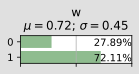

In [ ]:
%matplotlib inline
gnb.showProba(ie.posterior(w))

In [ ]:
ie.setEvidence({'s': [1, 0], 'c': [0, 1]})
ie.makeInference()
ie.posterior(w) # using gnb's feature

(pyAgrum.Potential<double>@0x5d18e36102c0) 
  w                |
0        |1        |
---------|---------|
 0.2800  | 0.7200  |

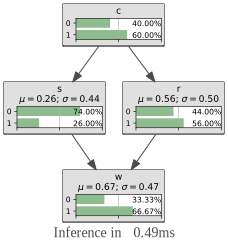

In [ ]:
gnb.showInference(bn,evs={})

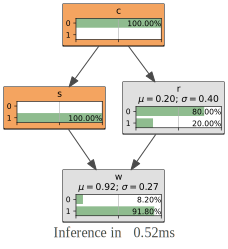

In [ ]:
gnb.showInference(bn,evs={'s':1,'c':0})

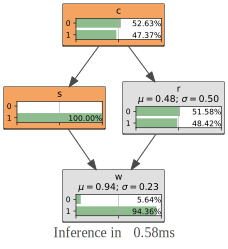

In [ ]:
gnb.showInference(bn,evs={'s':1,'c':[0.3,0.9]})

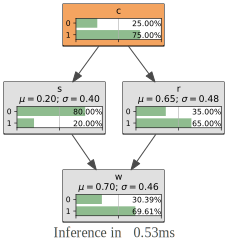

In [ ]:
gnb.showInference(bn,evs={'c':[0.5,1]})
# 0.4 x 0.5 = 0.2 , 0.6 x 1 = 0.6 , 0.2 / (0.2 + 0.6) = 25.0%

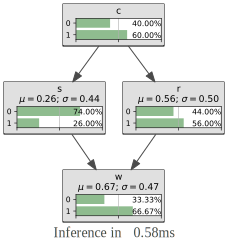

In [ ]:
gnb.showInference(bn)

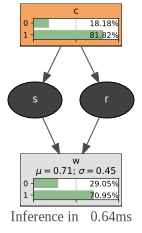

In [ ]:
gnb.showInference(bn,evs={'c':[0.3,0.9]},targets={'c','w'})

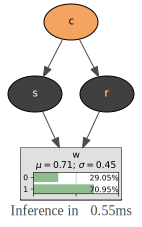

In [ ]:
gnb.showInference(bn,evs={'c':[0.3,0.9]},targets={'w'})

# Joint probablity distribution

In [ ]:
pCRSW=bn.cpt("c")*bn.cpt("r")*bn.cpt("s")*bn.cpt("w")
pCRSW

(pyAgrum.Potential<double>@0x5d18e36eb990) 
                    ||  s                |
r     |w     |c     ||0        |1        |
------|------|------||---------|---------|
0     |0     |0     || 0.1600  | 0.0160  |
1     |0     |0     || 0.0040  | 0.0004  |
0     |1     |0     || 0.0000  | 0.1440  |
1     |1     |0     || 0.0360  | 0.0396  |
0     |0     |1     || 0.1080  | 0.0012  |
1     |0     |1     || 0.0432  | 0.0005  |
0     |1     |1     || 0.0000  | 0.0108  |
1     |1     |1     || 0.3888  | 0.0475  |

In [ ]:
pWgivenC=(pCRSW.margSumOut(["r","s"])/pCRSW.margSumOut(["r","s","w"]))
pWgivenC

(pyAgrum.Potential<double>@0x5d18e2b5ae00) 
      ||  c                |
w     ||0        |1        |
------||---------|---------|
0     || 0.4510  | 0.2548  |
1     || 0.5490  | 0.7452  |

In [ ]:
pRS=pCRSW.margSumOut(["c","w"])
pRS

(pyAgrum.Potential<double>@0x5d18e36b0810) 
      ||  s                |
r     ||0        |1        |
------||---------|---------|
0     || 0.2680  | 0.1720  |
1     || 0.4720  | 0.0880  |

In [ ]:
pRS.margSumOut(["r"])

(pyAgrum.Potential<double>@0x5d18e30f9360) 
  s                |
0        |1        |
---------|---------|
 0.7400  | 0.2600  |

## Loading a benchmark BN model

In [ ]:
!pwd
bn = gum.loadBN(os.path.join("templates","alarm.bif"))
#bn = gum.loadBN("alarm.bif")

/content


IOError: [pyAgrum] I/O Error: No such file templates/alarm.bif

In [ ]:
gnb.showBN(bn,size='10')

# Visualisation and inspection


In [ ]:
print(bn.variableFromName('SHUNT'))

In [ ]:
print(bn.cpt(bn.idFromName('SHUNT')))

In [ ]:
gnb.showPotential(bn.cpt(bn.idFromName('SHUNT')),digits=3)

# Inference

In [ ]:
ie=gum.LazyPropagation(bn)
ie.makeInference()
gnb.showPosterior(bn,{'SHUNT':'HIGH'},'PRESS')

In [ ]:
gnb.showPosterior(bn,{'MINVOLSET':'NORMAL'},'VENTALV')

In [ ]:
gnb.showInference(bn,size="10",evs={'MINVOLSET':'NORMAL'})

In [ ]:
#ie=gum.LazyPropagation(bn)
ie.evidenceImpact('PRESS',['SHUNT','VENTALV'])

#  Entropy of all nodes

In [ ]:
gnb.showInformation(bn,{},size="20")

# Impact of evidence

In [ ]:
gnb.showInformation(bn,{"CO":0},size="9")

# Exploring the junction tree

Lazy Propagation, like several other inference algorithms, uses a junction tree to propagate information.

In [ ]:
jt=ie.junctionTree()
gnb.showJunctionTree(bn,size="10")

# Inference as a function

In [ ]:
import time

r=range(0,100,2)
xs=[x/100.0 for x in r]

tf=time.time()
ys=[gum.getPosterior(bn,{'MINVOLSET':[0,x/100.0,0.5]},'VENTALV').tolist()
        for x in r]
delta=time.time()-tf

p=plot(xs,ys)
legend(p,[bn.variableFromName('VENTALV').label(i)
          for i in range(bn.variableFromName('VENTALV').domainSize())],loc=7);
title('VENTALV (100 inferences in %d ms)'%delta);
ylabel('posterior Probability');
xlabel('Evidence on MINVOLSET : [0,x,0.5]');

In [ ]:
x=[p/100.0 for p in range(0,100)]

tf=time.time()
y=[gum.getPosterior(bn,{'HRBP':[1.0-p/100.0,1.0-p/100.0,p/100.0]},'TPR').tolist()
   for p in range(0,100)]
delta=time.time()-tf

p=plot(x,y)
title('HRBP (100 inferences in %d ms)'%delta);
v=bn.variableFromName('TPR');
legend([v.label(i) for i in range(v.domainSize())],loc='best');
np1=(transpose(y)[2]>transpose(y)[0]).argmin()
text(x[np1]-0.03,y[np1][0]+0.02,str(x[np1]),bbox=dict(facecolor='red', alpha=0.1));

# Data generation

In [ ]:
from pyAgrum.lib.bn2csv import generateCSV
generateCSV(bn,os.path.join("data","test.csv"),1000,visible=True)

In [ ]:
from pyAgrum.lib._utils import oslike
#oslike.head(os.path.join('dossier', 'test.csv'))
oslike.head(os.path.join("data","test.csv"))

# BN as a probabistic classifier

In [ ]:
from pyAgrum.lib.bn2roc import showROC
showROC(bn,os.path.join("data","test.csv"),
        variable='CATECHOL',label='HIGH',  # class and label
        visible=True,show_fig=True,with_labels=True)

In [ ]:
showROC(bn,os.path.join("data","test.csv"),'SAO2','HIGH',visible=True)

# Fast prototyping of BNs

In [ ]:
bn1=gum.fastBN("a->b;a->c;b->c;c->d",3)
gnb.sideBySide(*[gnb.getInference(bn1,evs={'c':val},targets={'a','c','d'}) for val in range(3)],
              captions=["<pre>Inference given that c={}</pre>".format(val) for val in range(3)])

In [ ]:
print(gum.getPosterior(bn1,evs={'c':0},target='c'))
print(gum.getPosterior(bn1,evs={'c':0},target='a'))


# Joint posterior, impact of evidence

In [ ]:
bn=gum.fastBN("a->b->c->d;b->e->d->f;g->c")
gnb.sideBySide(bn,gnb.getInference(bn))

In [ ]:
ie=gum.LazyPropagation(bn)
ie.addJointTarget({"e","f","g"})
ie.makeInference()
gnb.sideBySide(ie.jointPosterior({"e","f","g"}),ie.jointPosterior({"e","f"}),
               captions=["Joint posterior $P(e,f,g)$","Joint posterior $P(e,f)$"])

In [ ]:
gnb.sideBySide(ie.evidenceImpact("a",["e","f"]),ie.evidenceImpact("a",["d","e","f"]),
              captions=["$\\forall e,f, P(a|e,f)$",
                        "$\\forall d,e,f, P(a|d,e,f)=P(a|d,e)$ using d-separation"]
                        )

In [ ]:
gnb.sideBySide(ie.evidenceJointImpact(["a","b"],["e","f"]),
               ie.evidenceJointImpact(["a","b"],["d","e","f"]),
              captions=["$\\forall e,f, P(a,b|e,f)$",
                        "$\\forall d,e,f, P(a,b|d,e,f)=P(a,b|d,e)$ using d-separation"]
                        )

# BN structure learning from data


In [ ]:
!pwd
bn = gum.loadBN(os.path.join("templates","asia.bif"))
bn

In [ ]:
gum.generateCSV(bn,os.path.join("data","sample_asia.csv"),5000,True)
#gum.generateCSV(bn,"sample_asia.csv",5000,with_labels=True)

In [ ]:
import pandas
df=pandas.read_csv(os.path.join("data","sample_asia.csv"))
df.head()

In [ ]:
#gum.generateCSV(bn,"sample_asia.csv",5000,with_labels=True)
c=pandas.crosstab(df['dyspnoea?'],[df['tuberculos_or_cancer?'],df['bronchitis?']])
c

In [ ]:
import pyAgrum.lib._utils.oslike as oslike
print("===\n  Size of the generated database\n===")
oslike.wc_l(os.path.join("data","sample_asia.csv"))
print("\n===\n  First lines\n===")
oslike.head(os.path.join("data","sample_asia.csv"))

In [ ]:
gum.generateCSV(bn,os.path.join("data","sample_asia.csv"),5000,with_labels=True)
learner=gum.BNLearner(os.path.join("data","sample_asia.csv"),bn) #using bn as template for variables
learner.names()

In [ ]:
learner.setInitialDAG(bn.dag())
bn2=learner.learnParameters()
gnb.showBN(bn2)

In [ ]:
learner.idFromName('lung_cancer?')

In [ ]:
learner.nameFromId(4)

In [ ]:
learner=gum.BNLearner(os.path.join("data","sample_asia.csv"),bn) #using bn as template for variables and labels
learner.setInitialDAG(bn.dag())
bn2=learner.learnParameters()

In [ ]:
from IPython.display import HTML

HTML('<table><tr><td style="text-align:center;"><h3>original BN</h3></td>'+
     '<td style="text-align:center;"><h3>Learned BN</h3></td></tr>'+
     '<tr><td><center>'+
     gnb.getPotential(bn.cpt (bn.idFromName('visit_to_Asia?')))
     +'</center></td><td><center>'+
     gnb.getPotential(bn2.cpt(bn2.idFromName('visit_to_Asia?')))
     +'</center></td></tr><tr><td><center>'+
     gnb.getPotential(bn.cpt (bn.idFromName('tuberculosis?')))
     +'</center></td><td><center>'+
     gnb.getPotential(bn2.cpt(bn2.idFromName('tuberculosis?')))
     +'</center></td></tr></table>')


# Various score-based learning algorithms


In [ ]:
learner=gum.BNLearner(os.path.join("data","sample_asia.csv"),bn) #using bn as template for variables
learner.useLocalSearchWithTabuList()
bn2=learner.learnBN()
print("Learned in {0}ms".format(1000*learner.currentTime()))
gnb.sideBySide(bn2,gnb.getInformation(bn2))
kl=gum.BruteForceKL(bn,bn2)
kl.compute()

In [ ]:
learner=gum.BNLearner(os.path.join("data","sample_asia.csv"),bn) #using bn as template for variables
learner.useGreedyHillClimbing()
bn2=learner.learnBN()
print("Learned in {0}ms".format(1000*learner.currentTime()))
gnb.sideBySide(bn2,gnb.getInformation(bn2))

In [ ]:
learner=gum.BNLearner(os.path.join("data","sample_asia.csv"),bn) #using bn as template for variables
learner.useK2([0,1,2,3,4,5,6,7])
bn2=learner.learnBN()
print("Learned in {0}ms".format(1000*learner.currentTime()))
bn2

In [ ]:
learner=gum.BNLearner(os.path.join("data","sample_asia.csv"),bn) #using bn as template for variables
learner.useK2([7,6,5,4,3,2,1,0])
bn2=learner.learnBN()
print("Learned in {0}s".format(learner.currentTime()))
bn2


# Plotting the score during learning

In [ ]:
import numpy as np
%matplotlib inline

learner=gum.BNLearner(os.path.join("data","sample_asia.csv"),bn) #using bn as template for variables
learner.useLocalSearchWithTabuList()

# we could prefere a log2likelihood score
# learner.useScoreLog2Likelihood()
learner.setMaxTime(10)

# representation of the error as a pseudo log (negative values really represents negative epsilon
@np.vectorize
def pseudolog(x):
    seuil=2.0
    y=-x if x<0 else x

    if y<seuil:
        res=y*np.log10(seuil)/seuil
    else:
        res=np.log10(y)

    return res if x>0 else -res

# in order to control the complexity, we limit the number of parents
learner.setMaxIndegree(3) # no more than 3 parent by node
gnb.animApproximationScheme(learner,
                            scale=pseudolog) # scale by default is np.log10

bn2=learner.learnBN()

# Learning a tree


In [ ]:
learner=gum.BNLearner(os.path.join("data","sample_asia.csv"),bn) #using bn as template for variables
learner.useGreedyHillClimbing()

learner.setMaxIndegree(1) # no more than 1 parent by node

bntree=learner.learnBN()
bntree

# Learning with prior structural knowledge


In [ ]:
learner=gum.BNLearner(os.path.join("data","sample_asia.csv"),bn) #using bn as template for variables
learner.useGreedyHillClimbing()

# I know that smoking causes cancer
learner.addMandatoryArc("smoking?","lung_cancer?") # smoking->lung_cancer
# I know that visit to Asia may change the risk of tuberculosis
learner.addMandatoryArc("visit_to_Asia?","tuberculosis?") # visit_to_Asia->tuberculosis

bn2=learner.learnBN()
gnb.showBN(bn2,size="5")

# Comparing BNs


In [ ]:
help(gnb.getBNDiff)

In [ ]:
gnb.sideBySide(bn,bn2,gnb.getBNDiff(bn,bn2),
              captions=['target','learned BN','graphical diffs between target and learned'])

In [ ]:
kl=gum.BruteForceKL(bn,bn2)
kl.compute()

In [ ]:
learner=gum.BNLearner(os.path.join("data","sample_asia.csv"),bn) #using bn as template for variables
learner.useGreedyHillClimbing()

# I know that smoking causes cancer
learner.addMandatoryArc(0,1)

# we prefere a log2likelihood score
learner.useScoreLog2Likelihood()

# in order to control the complexity, we limit the number of parents
learner.setMaxIndegree(1) # no more than 1 parent by node

bn2=learner.learnBN()
kl=gum.BruteForceKL(bn,bn2)
gnb.sideBySide(bn2,
               "<br/>".join(["<b>"+k+"</b> :"+str(v) for k,v in kl.compute().items()]),
               captions=["learned BN","distances"])

In [ ]:
learner=gum.BNLearner(os.path.join("data","sample_asia.csv"),bn) #using bn as template for variables
learner.useGreedyHillClimbing()
learner.addMandatoryArc(0,1)
bn2=learner.learnBN()
kl=gum.BruteForceKL(bn,bn2)
gnb.sideBySide(bn2,
               "<br/>".join(["<b>"+k+"</b> :"+str(v) for k,v in kl.compute().items()]),
               captions=["learned BN","distances"])

In [ ]:
learner=gum.BNLearner(os.path.join("data","sample_asia.csv"),bn) #using bn as template for variables
learner.useLocalSearchWithTabuList()

learner.setInitialDAG(bn2.dag())
#learner.setMaxNbDecreasingChanges(2)

bn3=learner.learnBN()
kl=gum.BruteForceKL(bn,bn3)
gnb.sideBySide(bn3,
               "<br/>".join(["<b>"+k+"</b> :"+str(v) for k,v in kl.compute().items()]),
               captions=["learned BN","distances"])

In [ ]:
from pyAgrum.lib.bn2csv import generateCSV
generateCSV(bn,os.path.join("data","test.csv"),1000,visible=True)

In [ ]:
from pyAgrum.lib._utils import oslike
oslike.head(os.path.join("data","test.csv"))

In [ ]:
bn1=gum.fastBN("a->b;a->c;b->c;c->d",3)

gnb.sideBySide(*[gnb.getInference(bn1,evs={'c':val},
                targets={'a','c','d'}) for val in range(3)],
              captions=["<pre>Inference given that c={}</pre>".format(val) for val in range(3)])

---
# TO DO

- ### Implémenter avec PyAGrUM les exercices 6 et 8 du TD1 PGM.
- ### Confirmer les résutats obtenus "à la main".
---

### Exercice 8 du TD :


Consider the Bayesian network Figure 2 with a new variable $L$ being the child of $B$. Suppose that $P(L=1\mid B=1)=0.8$ and $P(L=1 \mid B=0)=0.0$. "$L=1$" denotes "the car headlights are well functioning".

- Compute $P(L=0)$.
- Compute $L$ and $F$ independent?
- Compute $P(F=1\mid G=0,L=1$) and compare to $P(F=1\mid G=0$). Are $F$ and $L$ independent given $G$?
- Write down all the conditional and inconditional independencies encoded in this directed acyclic graph.
- What is the compression rate in terms of memory space?


### Exercice 6 du TD :

La Figure 1 montre une chaîne de Markov cachée comprenant 3 états 1, 2 ,3. Les valuations des arcs sont les probabilités de transition entre les états.  On suppose que le systéme markovien étudié visite ces états succesivement avec les probabilités initiales $\pi = (0.6,0.4,0)$. Dans chaque état, le systéme émet un symbole choisi dans l'alphabet V=\{a,b\} avec les probabilités d'émission affichées.

- Evaluer la probabilité de la suite d'observation $aab$.
- Déterminer la {\em meilleure} suite d'états qui rend la séquence observée, $aab$, la plus probable.

### Exercice 2 du CC2 :

$
    P(y \mid \mathbf{do}(x)) =
\sum_{\mathbf{pa}_x}
    P(y \mid x, \mathbf{pa}_x) P(\mathbf{pa}_x)
$

Appliquer la formule précédente pour en déduire $P(sante \mid \mathbf{do}(bio))$. On supposera que les variables sont binaires et que : 30\% des individus ont des revenus élévés, 60\% mangent bio parmi les revenus élevés, 40\% mangent bio parmi les revenus modestes, 80\% sont en bonne santé sachant bio et revenus élévés, 70\% sont en bonne santé sachant bio et revenus modestes, 60\% sont en bonne santé sachant non bio et revenus élévés, et 50\% sont en bonne santé sachant non bio et revenus modestes.

Vous trouverez ci-dessous des examples d'inférence causale réalisés avec PyAGrUM :

http://www-desir.lip6.fr/~phw/aGrUM/docs/last/notebooks/Tobacco.ipynb.html

## **Exo 6 du TD**

La probabilité de la séquence 'aab' est : 0.49999999999999994
La séquence d'états la plus probable pour 'aab' est : [([{'etat_1': 0}], 0.6), ([{'etat_2': 1}], 0.5800000000000001), ([{'etat_3': 0}], 0.474)]


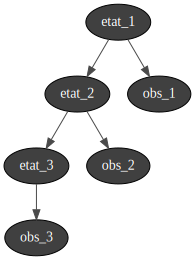

In [ ]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb

hmm = gum.BayesNet('HiddenMarkovModel')
states = [hmm.add(gum.LabelizedVariable(f'etat_{i+1}', '', 3)) for i in range(3)]

hmm.cpt(states[0]).fillWith([0.6, 0.4, 0.0])

#transitions entre les états
hmm.addArc(states[0], states[1])
hmm.addArc(states[1], states[2])

#probabilités de transition
hmm.cpt(states[1])[{'etat_1': 0}] = [0.5, 0.5, 0.0]
hmm.cpt(states[1])[{'etat_1': 1}] = [0.0, 0.7, 0.3]
hmm.cpt(states[1])[{'etat_1': 2}] = [0.0, 0.0, 1.0]

hmm.cpt(states[2])[{'etat_2': 0}] = [1.0, 0.0, 0.0]
hmm.cpt(states[2])[{'etat_2': 1}] = [0.3, 0.2, 0.5]
hmm.cpt(states[2])[{'etat_2': 2}] = [0.0, 0.0, 1.0]

#variables observées
obs_vars = []
for i in range(3):
    obs_var = hmm.add(gum.LabelizedVariable(f'obs_{i+1}', '', 2))
    obs_vars.append(obs_var)
    hmm.addArc(states[i], obs_var)

# probabilités d'émission des observations
# État 1 émet 'a' avec une probabilité de 1
hmm.cpt(obs_vars[0])[{'etat_1': 0}] = [1, 0]
hmm.cpt(obs_vars[0])[{'etat_1': 1}] = [1, 0]
hmm.cpt(obs_vars[0])[{'etat_1': 2}] = [1, 0]

# État 2 émet 'a' ou 'b' avec une probabilité de 0.5
hmm.cpt(obs_vars[1])[{'etat_2': 0}] = [0.5, 0.5]
hmm.cpt(obs_vars[1])[{'etat_2': 1}] = [0.5, 0.5]
hmm.cpt(obs_vars[1])[{'etat_2': 2}] = [0.5, 0.5]

# État 3 émet 'b' avec une probabilité de 1
hmm.cpt(obs_vars[2])[{'etat_3': 0}] = [0, 1]
hmm.cpt(obs_vars[2])[{'etat_3': 1}] = [0, 1]
hmm.cpt(obs_vars[2])[{'etat_3': 2}] = [0, 1]

ie = gum.LazyPropagation(hmm)

ie.setEvidence({'obs_1': 0, 'obs_2': 0, 'obs_3': 1})

prob_aab = ie.evidenceProbability()

print(f"La probabilité de la séquence 'aab' est : {prob_aab}")

ie.makeInference()

most_probable_states = [ie.posterior(state).argmax() for state in states]
print(f"La séquence d'états la plus probable pour 'aab' est : {most_probable_states}")

gnb.showBN(hmm)

## **Exo 2 du CC**

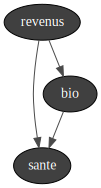


  sante            |
0        |1        |
---------|---------|
 0.2609  | 0.7391  |



In [ ]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb

bn = gum.BayesNet('Bio et Sante')

revenus = bn.add(gum.LabelizedVariable('revenus', 'Revenus élevés ou modestes', 2))
bio = bn.add(gum.LabelizedVariable('bio', 'Mange bio ou non', 2))
sante = bn.add(gum.LabelizedVariable('sante', 'Bonne santé ou non', 2))

bn.addArc(revenus, bio)
bn.addArc(revenus, sante)
bn.addArc(bio, sante)

bn.cpt(revenus)[{'revenus': 0}] = 0.7  # Revenus modestes
bn.cpt(revenus)[{'revenus': 1}] = 0.3  # Revenus élevés

bn.cpt(bio)[{'revenus': 0, 'bio': 0}] = 0.6  # Ne mange pas bio avec revenus modestes
bn.cpt(bio)[{'revenus': 0, 'bio': 1}] = 0.4  # Mange bio avec revenus modestes
bn.cpt(bio)[{'revenus': 1, 'bio': 0}] = 0.4  # Ne mange pas bio avec revenus élevés
bn.cpt(bio)[{'revenus': 1, 'bio': 1}] = 0.6  # Mange bio avec revenus élevés

bn.cpt(sante)[{'revenus': 0, 'bio': 0, 'sante': 0}] = 0.5  # Mauvaise santé, ne mange pas bio, revenus modestes
bn.cpt(sante)[{'revenus': 0, 'bio': 0, 'sante': 1}] = 0.5  # Bonne santé, ne mange pas bio, revenus modestes
bn.cpt(sante)[{'revenus': 0, 'bio': 1, 'sante': 0}] = 0.3  # Mauvaise santé, mange bio, revenus modestes
bn.cpt(sante)[{'revenus': 0, 'bio': 1, 'sante': 1}] = 0.7  # Bonne santé, mange bio, revenus modestes
bn.cpt(sante)[{'revenus': 1, 'bio': 0, 'sante': 0}] = 0.4  # Mauvaise santé, ne mange pas bio, revenus élevés
bn.cpt(sante)[{'revenus': 1, 'bio': 0, 'sante': 1}] = 0.6  # Bonne santé, ne mange pas bio, revenus élevés
bn.cpt(sante)[{'revenus': 1, 'bio': 1, 'sante': 0}] = 0.2  # Mauvaise santé, mange bio, revenus élevés
bn.cpt(sante)[{'revenus': 1, 'bio': 1, 'sante': 1}] = 0.8  # Bonne santé, mange bio, revenus élevés

gnb.showBN(bn)

# Calcul de l'effet causal
ie = gum.LazyPropagation(bn)
ie.setEvidence({'bio': 1})
ie.makeInference()
p_sante_do_bio = ie.posterior('sante')
print(p_sante_do_bio)

## **Exo 8 du TD**

In [ ]:
import pyAgrum as gum

bn = gum.BayesNet('CarDiagnostics')

B = bn.add(gum.LabelizedVariable('B', 'Battery', 2))  # 0 pour déchargée, 1 pour chargée
F = bn.add(gum.LabelizedVariable('F', 'Fuel tank', 2))  # 0 pour vide, 1 pour plein
L = bn.add(gum.LabelizedVariable('L', 'headLights', 2))  # 0 pour non fonctionnel, 1 pour fonctionnel
G = bn.add(gum.LabelizedVariable('G', 'Gauge reading', 2))  # 0 pour Empty, 1 pour Full

bn.addArc(B, L)
bn.addArc(B, G)
bn.addArc(F, G)

bn.cpt(B).fillWith([0.1, 0.9])  # P(B=1) = 0.9, P(B=0) = 0.1
bn.cpt(F).fillWith([0.1, 0.9])  # P(F=1) = 0.9, P(F=0) = 0.1
bn.cpt(L)[{'B': 0}] = [1, 0]  # P(L=1 | B=0) = 0.0
bn.cpt(L)[{'B': 1}] = [0.2, 0.8]  # P(L=1 | B=1) = 0.8
bn.cpt(G)[{'B': 0, 'F': 0}] = [0.9, 0.1]  # P(G=1 | B=0, F=0) = 0.1
bn.cpt(G)[{'B': 0, 'F': 1}] = [0.8, 0.2]  # P(G=1 | B=0, F=1) = 0.2
bn.cpt(G)[{'B': 1, 'F': 0}] = [0.8, 0.2]  # P(G=1 | B=1, F=0) = 0.2
bn.cpt(G)[{'B': 1, 'F': 1}] = [0.2, 0.8]  # P(G=1 | B=1, F=1) = 0.8

# a) Calcul de P(L=0)
prob_L_eq_0 = bn.cpt(L)[0, 0] + bn.cpt(L)[0, 1]

# b) Vérification de l'indépendance entre L et F
are_independent = bn.isIndependent(L, F)
# c) Calcul de P(F=1 | G=0, L=1) et comparaison avec P(F=1 | G=0)
ie = gum.LazyPropagation(bn)
ie.setEvidence({'G': 0, 'L': 1})
ie.makeInference()
prob_F_eq_1_given_G_eq_0_and_L_eq_1 = ie.posterior(F)[1]

ie.setEvidence({'G': 0})
ie.makeInference()
prob_F_eq_1_given_G_eq_0 = ie.posterior(F)[1]

print(f"P(L=0) = {prob_L_eq_0}")
print("Are L and F independent?", are_independent)
print(f"P(F=1 | G=0, L=1) = {prob_F_eq_1_given_G_eq_0_and_L_eq_1}")
print(f"P(F=1 | G=0) = {prob_F_eq_1_given_G_eq_0}")


P(L=0) = 1.0
Are L and F independent? True
P(F=1 | G=0, L=1) = 0.6923076923076923
P(F=1 | G=0) = 0.7428571428571428
